### Hold-out cross-validation

Hold-out cross-validation is the simplest and most common technique. You might not know that it is a hold-out method but you certainly use it every day.

The algorithm of hold-out technique:

1. Divide the dataset into two parts: the training set and the test set. Usually, 80% of the dataset goes to the training set and 20% to the test set but you may choose any splitting that suits you better
2. Train the model on the training set
3. Validate on the test set
4. Save the result of the validation

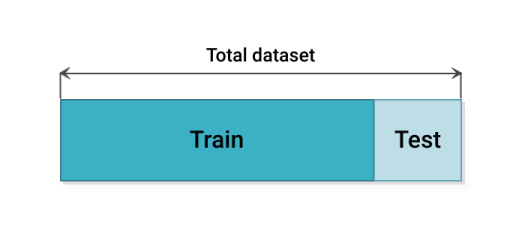

That’s it. 

We usually use the hold-out method on large datasets as it requires training the model only once.

#### It is really easy to implement hold-out. For example, you may do it using sklearn.model_selection.train_test_split.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

x = np.arange(10).reshape(5, 2)
y = range(5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Still, hold-out has a major disadvantage. 

For example, a dataset that is not completely even distribution-wise. If so we may end up in a rough spot after the split. For example, the training set will not represent the test set. Both training and test sets may differ a lot, one of them might be easier or harder. 

Moreover, the fact that we test our model only once might be a bottleneck for this method. Due to the reasons mentioned before, the result obtained by the hold-out technique may be considered inaccurate.

### k-Fold cross-validation

k-Fold cross-validation is a technique that minimizes the disadvantages of the hold-out method. k-Fold introduces a new way of splitting the dataset which helps to overcome the “test only once bottleneck”.

The algorithm of the k-Fold technique:

1. Pick a number of folds – k. Usually, k is 5 or 10 but you can choose any number which is less than the dataset’s length.
2. Split the dataset into k equal (if possible) parts (they are called folds)
3. Choose k – 1 folds as the training set. The remaining fold will be the test set
4. Train the model on the training set. On each iteration of cross-validation, you must train a new model independently of the model trained on the previous iteration
5. Validate on the test set
6. Save the result of the validation
7. Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
8. To get the final score average the results that you got on step 6.

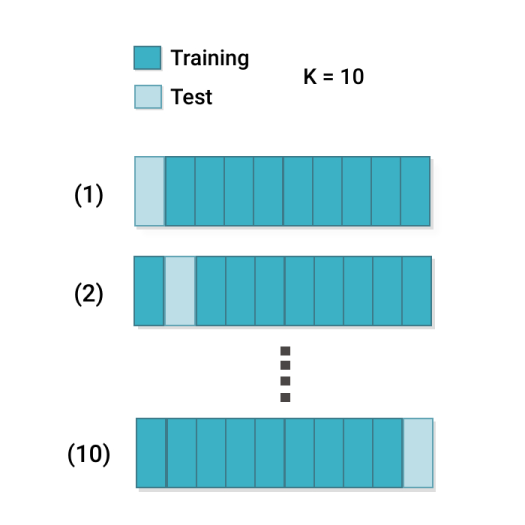

#### To perform k-Fold cross-validation you can use sklearn.model_selection.KFold.

In [2]:
from sklearn.model_selection import KFold

x = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In general, it is always better to use k-Fold technique instead of hold-out. In a head to head, comparison k-Fold gives a more stable and trustworthy result since training and testing is performed on several different parts of the dataset. We can make the overall score even more robust if we increase the number of folds to test the model on many different sub-datasets.

Still, k-Fold method has a disadvantage. Increasing k results in training more models and the training process might be really expensive and time-consuming.

### Leave-one-out cross-validation

Leave-one-out сross-validation (LOOCV) is an extreme case of k-Fold CV. Imagine if k is equal to n where n is the number of samples in the dataset. Such k-Fold case is equivalent to Leave-one-out technique.

The algorithm of LOOCV technique:

1. Choose one sample from the dataset which will be the test set
2. The remaining n – 1 samples will be the training set
3. Train the model on the training set. On each iteration, a new model must be trained
4. Validate on the test set
5. Save the result of the validation
6. Repeat steps 1 – 5 n times as for n samples we have n different training and test sets
7. To get the final score average the results that you got on step 5.

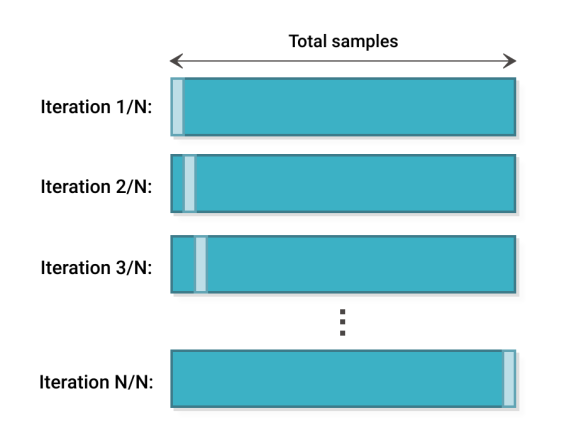

#### For LOOCV sklearn also has a built-in method. It can be found in the model_selection library – sklearn.model_selection.LeaveOneOut.

In [4]:
from sklearn.model_selection import LeaveOneOut

x = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()

for train_index, test_index in loo.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1] TEST: [0]
TRAIN: [0] TEST: [1]


The greatest advantage of Leave-one-out cross-validation is that it doesn’t waste much data. We use only one sample from the whole dataset as a test set, whereas the rest is the training set. But when compared with k-Fold CV, LOOCV requires building n models instead of k models, when we know that n which stands for the number of samples in the dataset is much higher than k. It means LOOCV is more computationally expensive than k-Fold, it may take plenty of time to cross-validate the model using LOOCV.

Thus, the Data Science community has a general rule based on empirical evidence and different researches, which suggests that 5- or 10-fold cross-validation should be preferred over LOOCV.

### Leave-p-out cross-validation

Leave-p-out cross-validation (LpOC) is similar to Leave-one-out CV as it creates all the possible training and test sets by using p samples as the test set. All mentioned about LOOCV is true and for LpOC.

Still, it is worth mentioning that unlike LOOCV and k-Fold test sets will overlap for LpOC if p is higher than 1.

The algorithm of LpOC technique:

1. Choose p samples from the dataset which will be the test set
2. The remaining n – p samples will be the training set
3. Train the model on the training set. On each iteration, a new model must be trained
4. Validate on the test set
5. Save the result of the validation
6. Repeat steps 2 – 5 Cpn times 
7. To get the final score average the results that you got on step 5

#### You can perform Leave-p-out CV using sklearn – sklearn.model_selection.LeavePOut.

In [5]:
from sklearn.model_selection import LeavePOut

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
lpo = LeavePOut(2)

for train_index, test_index in lpo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [1 3] TEST: [0 2]
TRAIN: [1 2] TEST: [0 3]
TRAIN: [0 3] TEST: [1 2]
TRAIN: [0 2] TEST: [1 3]
TRAIN: [0 1] TEST: [2 3]


LpOC has all the disadvantages of the LOOCV, but, nevertheless, it’s as robust as LOOCV.

### Stratified k-Fold cross-validation

Sometimes we may face a large imbalance of the target value in the dataset. For example, in a dataset concerning wristwatch prices, there might be a larger number of wristwatch having a high price. In the case of classification, in cats and dogs dataset there might be a large shift towards the dog class.

Stratified k-Fold is a variation of the standard k-Fold CV technique which is designed to be effective in such cases of target imbalance. 

It works as follows. Stratified k-Fold splits the dataset on k folds such that each fold contains approximately the same percentage of samples of each target class as the complete set. In the case of regression, Stratified k-Fold makes sure that the mean target value is approximately equal in all the folds.

The algorithm of Stratified k-Fold technique:

1. Pick a number of folds – k
2. Split the dataset into k folds. Each fold must contain approximately the same percentage of samples of each target class as the complete set 
3. Choose k – 1 folds which will be the training set. The remaining fold will be the test set
4. Train the model on the training set. On each iteration a new model must be trained
5. Validate on the test set
6. Save the result of the validation
7. Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
8. To get the final score average the results that you got on step 6.

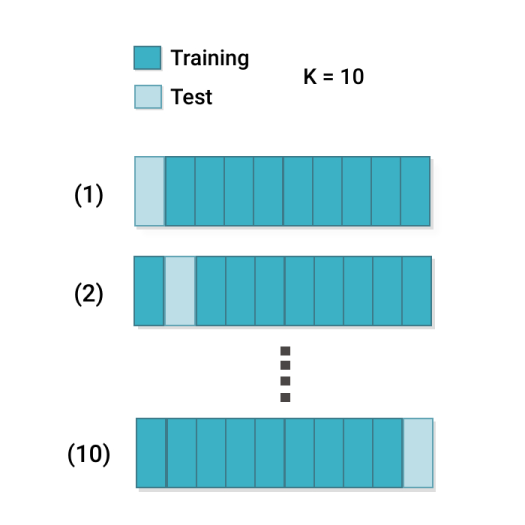

As you may have noticed, the algorithm for Stratified k-Fold technique is similar to the standard k-Folds. You don’t need to code something additionally as the method will do everything necessary for you.

#### Stratified k-Fold also has a built-in method in sklearn – sklearn.model_selection.StratifiedKFold.

In [9]:
from sklearn.model_selection import StratifiedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 0, 0, 1])
skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


All mentioned above about k-Fold CV is true for Stratified k-Fold technique. When choosing between different CV methods, make sure you are using the proper one. For example, you might think that your model performs badly simply because you are using k-Fold CV to validate the model which was trained on the dataset with a class imbalance. To avoid that you should always do a proper exploratory data analysis on your data.

### Repeated k-Fold cross-validation

Repeated k-Fold cross-validation or Repeated random sub-sampling CV is probably the most robust of all CV techniques in this paper. It is a variation of k-Fold but in the case of Repeated k-Folds k is not the number of folds. It is the number of times we will train the model.

The general idea is that on every iteration we will randomly select samples all over the dataset as our test set. For example, if we decide that 20% of the dataset will be our test set, 20% of samples will be randomly selected and the rest 80% will become the training set. 

The algorithm of Repeated k-Fold technique:
    
1. Pick k – number of times the model will be trained
2. Pick a number of samples which will be the test set
3. Split the dataset
4. Train on the training set. On each iteration of cross-validation, a new model must be trained
5. Validate on the test set
6. Save the result of the validation
7. Repeat steps 3-6 k times
8. To get the final score average the results that you got on step 6.

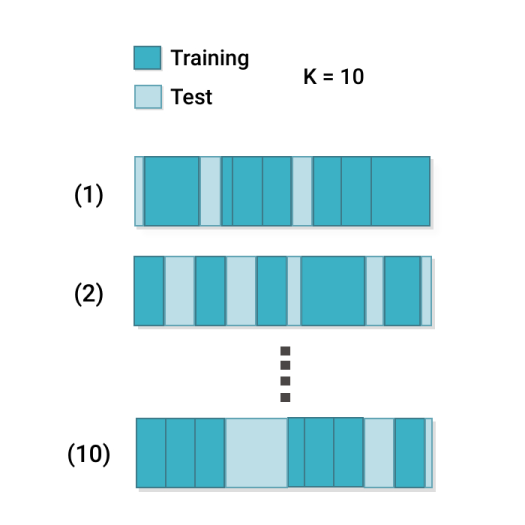

Repeated k-Fold has clear advantages over standard k-Fold CV. Firstly, the proportion of train/test split is not dependent on the number of iterations. Secondly, we can even set unique proportions for every iteration. Thirdly, random selection of samples from the dataset makes Repeated k-Fold even more robust to selection bias.

Still, there are some disadvantages. k-Fold CV guarantees that the model will be tested on all samples, whereas Repeated k-Fold is based on randomization which means that some samples may never be selected to be in the test set at all. At the same time, some samples might be selected multiple times. Thus making it a bad choice for imbalanced datasets.

Sklearn will help you to implement a Repeated k-Fold CV. Just use sklearn.model_selection.RepeatedKFold. In sklearn implementation of this technique you must set the number of folds that you want to have (n_splits) and the number of times the split will be performed (n_repeats). It guarantees that you will have different folds on each iteration.

In [10]:
from sklearn.model_selection import RepeatedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=42)

for train_index, test_index in rkf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 2] TEST: [1 3]
TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]
TRAIN: [1 3] TEST: [0 2]


### Nested k-Fold

Unlike the other CV techniques, which are designed to evaluate the quality of an algorithm, Nested k-fold CV is used to train a model in which hyperparameters also need to be optimized. It estimates the generalization error of the underlying model and its (hyper)parameter search.

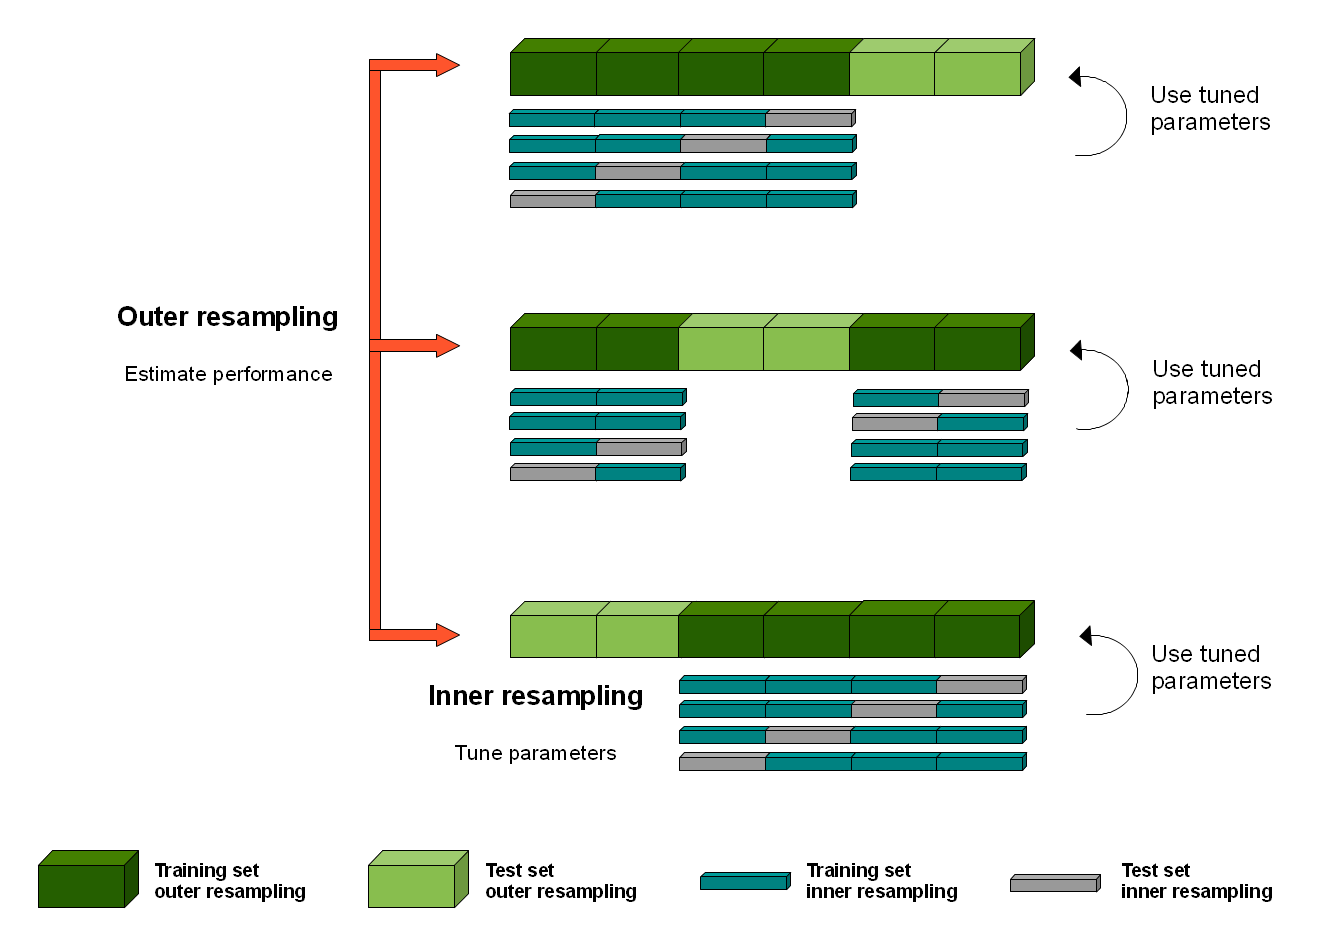

The algorithm of Nested k-Fold technique:

1. Define set of hyper-parameter combinations, C, for current model. If model has no hyper-parameters, C is the empty set.
2. Divide data into K folds with approximately equal distribution of cases and controls.
3. (outer loop) For fold k, in the K folds:
- Set fold k, as the test set.
- Perform automated feature selection on the remaining K-1 folds.
- For parameter combination c in C:
    -  (inner loop) For fold k, in the remaining K-1 folds:
        - Set fold k, as the validation set.
        - Train model on remaining K-2 folds.
        - Evaluate model performance on fold k.
    - Calculate average performance over K-2 folds for parameter combination c.
- Train model on K-1 folds using hyper-parameter combination that yielded best average performance over all steps of the inner loop.
- Evaluate model performance on fold k.
4. Calculate average performance over K folds.
The inner loop performs cross-validation to identify the best features and model hyper-parameters using the k-1 data folds available at each iteration of the outer loop. The model is trained once for each outer loop step and evaluated on the held-out data fold. This process yields k evaluations of the model performance, one for each data fold, and allows the model to be tested on every sample.

It is to be noted that this technique is computationally expensive because plenty of models is trained and evaluated. Unfortunately, there is no built-in method in sklearn that would perform Nested k-Fold CV for you.

### Time-series cross-validation

Traditional cross-validation techniques don’t work on sequential data such as time-series because we cannot choose random data points and assign them to either the test set or the train set as it makes no sense to use the values from the future to forecast values in the past. There are mainly two ways to go about this:

1. Rolling cross-validation

    Cross-validation is done on a rolling basis i.e. starting with a small subset of data for training purposes, predicting the future values, and then checking the accuracy on the forecasted data points. The following image can help you get the intuition behind this approach.

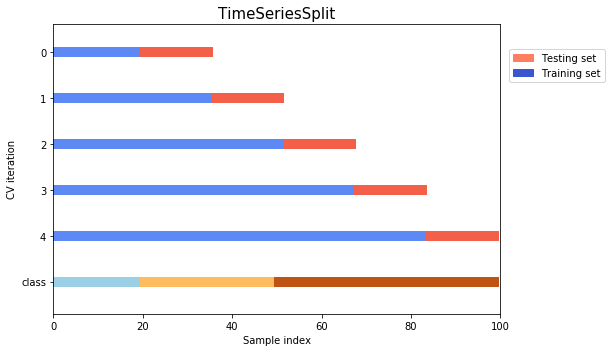

2. Blocked cross-validation

    The first technique may introduce leakage from future data to the model. The model will observe future patterns to forecast and try to memorize them. That’s why blocked cross-validation was introduced. 

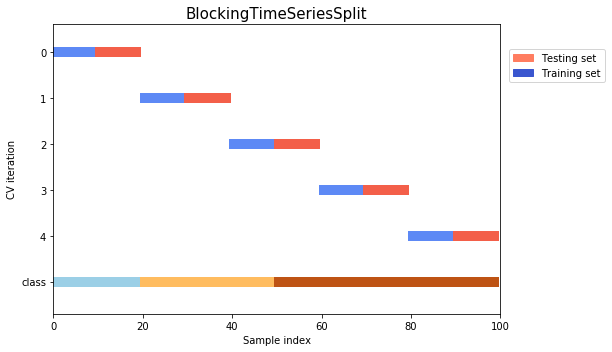

It works by adding margins at two positions. The first is between the training and validation folds in order to prevent the model from observing lag values which are used twice, once as a regressor and another as a response. The second is between the folds used at each iteration in order to prevent the model from memorizing patterns from one iteration to the next.

### Cross-validation in Machine Learning

When is cross-validation the right choice?

Although doing cross-validation of your trained model can never be termed as a bad choice, there are certain scenarios in which cross-validation becomes an absolute necessity: 

1. Limited dataset

    Let’s say we have 100 data points and we are dealing with a multi-class classification problem with 10 classes, this averages out to ~10 examples per class. In an 80-20 train-test split, this number would go down even further to 8 samples per class for training. The smart thing to do here would be to use cross-validation and utilize our entire dataset for training as well as testing.

2. Dependent data points

    When we perform a random train-test split of our data, we assume that our examples are independent. It means that knowing some instances will not help us understand other instances. However, that’s not always the case, and in such situations, it’s important that our model gets familiar with the entire dataset which is possible with cross-validation.


3. Cons of single metric

    In the absence of cross-validation, we only get a single value of accuracy or precision or recall which could be an outcome of chance. When we train multiple models, we eliminate such possibilities and get a metric per model which results in robust insights. 
 

4. Hyperparameter tuning

    Although there are many methods to tune the hyperparameters of your model such as grid search, Bayesian optimization, etc., this exercise can’t be done on training or test set, and a need for a validation set arises. Thus, we fall back to the same splitting problem that we have discussed above and cross-validation can help us out of this.